In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Titanic-Dataset for experiment.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


# Data Cleaning 

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.drop(df[["PassengerId", "Name", "Ticket"]], axis = 1)

In [6]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Cabin"].fillna('Unknown', inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [7]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [8]:
df.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,Unknown,S
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,Unknown,S
3,1,1,female,35.000000,1,0,53.1000,C,S
4,0,3,male,35.000000,0,0,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Unknown,Q
887,1,1,female,19.000000,0,0,30.0000,B,S
888,0,3,female,29.699118,1,2,23.4500,Unknown,S
889,1,1,male,26.000000,0,0,30.0000,C,C


In [9]:
print(df.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [10]:
df["Age"] = df["Age"].astype(int)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22,1,0,7.2500,Unknown,S
1,1,1,female,38,1,0,71.2833,C,C
2,1,3,female,26,0,0,7.9250,Unknown,S
3,1,1,female,35,1,0,53.1000,C,S
4,0,3,male,35,0,0,8.0500,Unknown,S


# Exploratory Data Anlaysis EDA

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# correlation between Survived to every other columns

<Axes: >

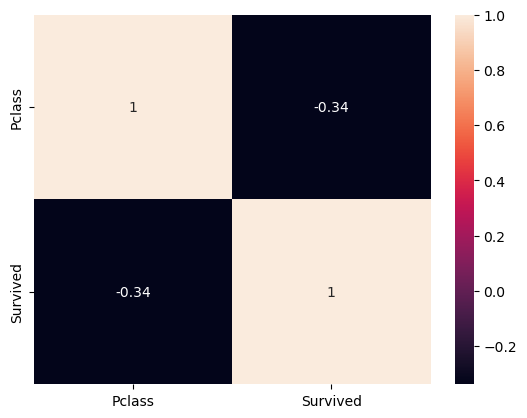

In [14]:
s_P = df[["Pclass", "Survived"]].corr() # survived and Pclass
sns.heatmap(s_P, annot=True)

In [15]:
df["Sex"] = df["Sex"].astype(str).replace({'male': 1, 'female': 0})

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22,1,0,7.2500,Unknown,S
1,1,1,0,38,1,0,71.2833,C,C
2,1,3,0,26,0,0,7.9250,Unknown,S
3,1,1,0,35,1,0,53.1000,C,S
4,0,3,1,35,0,0,8.0500,Unknown,S


<Axes: >

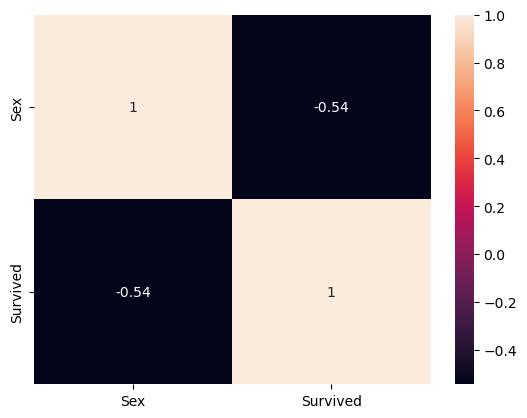

In [17]:
# for survived and sex, first convert string to integer
s_sx = df[["Sex", "Survived"]].corr() # survived and Sex
sns.heatmap(s_sx, annot=True)

<Axes: >

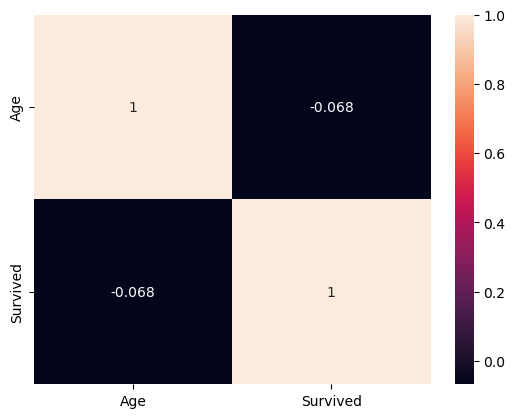

In [18]:
s_a = df[["Age", "Survived"]].corr() # survived and Age
sns.heatmap(s_a, annot=True)

<Axes: >

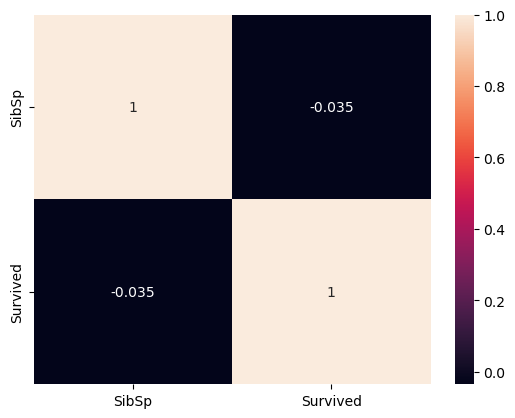

In [19]:
s_s = df[["SibSp", "Survived"]].corr() #survived and Sibsp 
sns.heatmap(s_s, annot=True)

<Axes: >

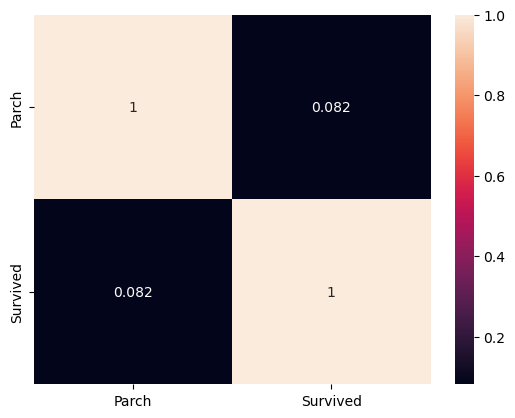

In [20]:
s_p = df[["Parch", "Survived"]].corr() # survived and Parch
sns.heatmap(s_p, annot=True)

<Axes: >

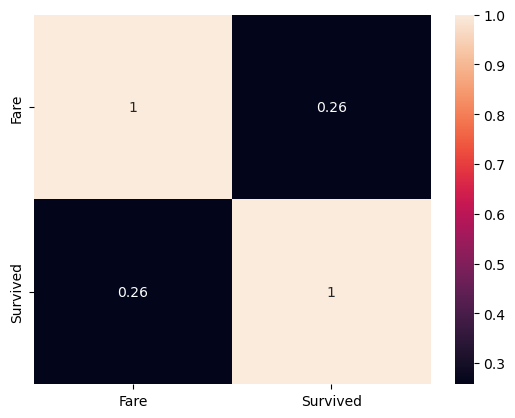

In [21]:
s_f = df[["Fare", "Survived"]].corr() #survived and Fare 
sns.heatmap(s_f, annot=True)

In [22]:
df['Cabin'] = df['Cabin'].astype(str).replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 'K':11, 'L':12, 'M':13, 'N':14, 'O':15, 'P':16, 'Q':17, 'R':18, 'S':19, 'T':20, 'U':21, 'V':22, 'W':23, 'X':24, 'Y':25, 'Z':26, 'Unknown':0})

<Axes: >

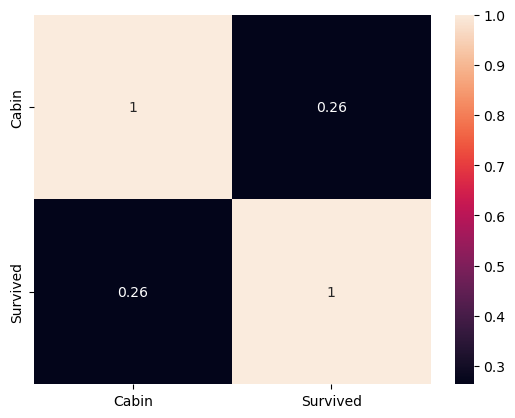

In [23]:
# for Cabin and Survived 
s_c = df[['Cabin', 'Survived']].corr()
sns.heatmap(s_c, annot=True)

In [24]:
df['Embarked'] = df['Embarked'].astype(str).replace({'C':0, 'S':1, 'Q':2})

In [25]:
df['Embarked'].sample(10)

382    1
42     0
240    0
855    1
649    1
36     0
20     1
713    1
757    1
40     1
Name: Embarked, dtype: int64

<Axes: >

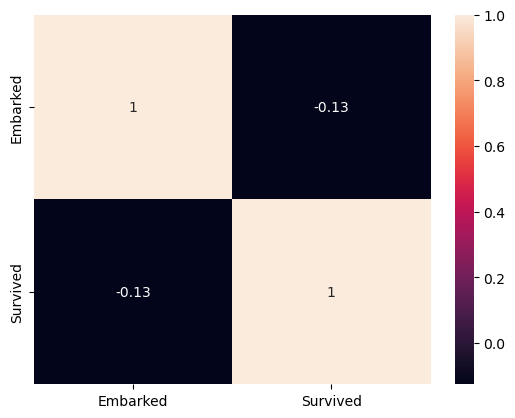

In [26]:
# for Embarked and Survived
s_e = df[['Embarked', 'Survived']].corr()
sns.heatmap(s_e, annot=True)

In [27]:
# from the above findings it can say that the correlation is moderte between survived and Age columns, else there is weak 
# now
# finding the data visualization between target variable (survived) to all other variables

<Axes: xlabel='Pclass', ylabel='Count'>

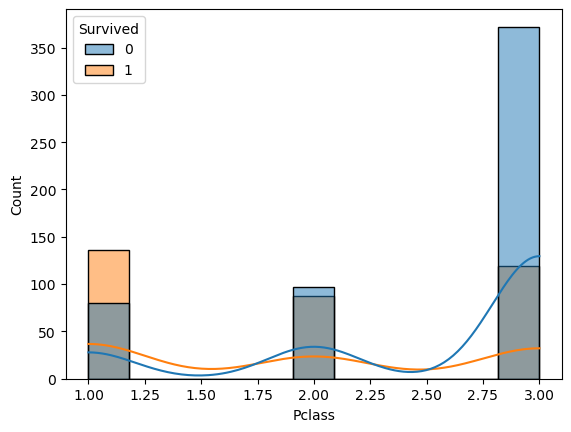

In [28]:
# for Pclass and Survived columns
sns.histplot(df, x='Pclass', hue='Survived', kde=True)
# this shows that most of the class 3 passenger were died whereas most of 1st class passenger were survived

<Axes: xlabel='Sex', ylabel='Count'>

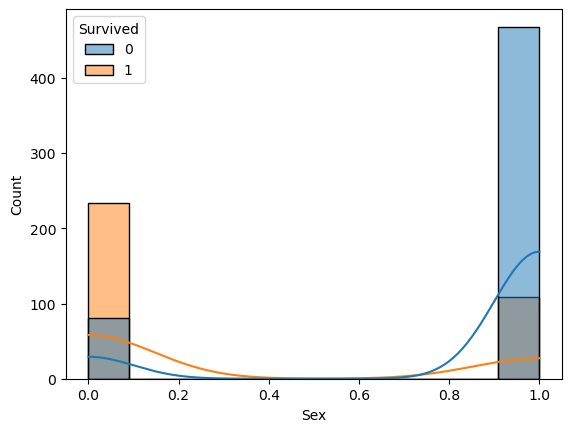

In [29]:
# for Age and Survived 
sns.histplot(df, x='Sex', hue='Survived', kde=True)
# Reminder: on x-axis, 0.0 refers to female and 1.0 refers to male as per our previous conversion 
# the result shows that most of the male died and female survived 

<Axes: xlabel='Age', ylabel='Count'>

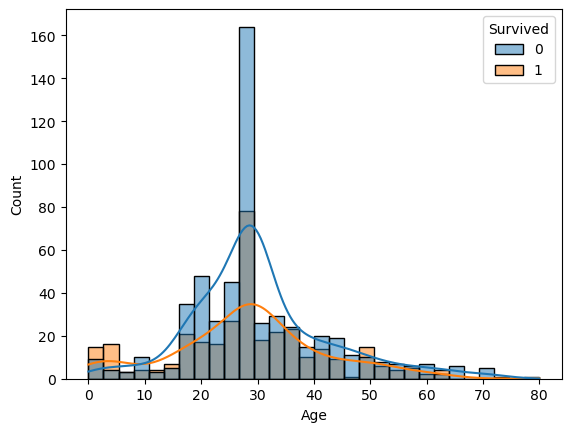

In [30]:
# for Age and Survived 
sns.histplot(df, x='Age', hue='Survived', kde=True)
# the following graph shows that children of age range 0-5 and people of age 50 were mostly survived the incident whereas adults of age range 28-30 were mostly died

<Axes: xlabel='SibSp', ylabel='Count'>

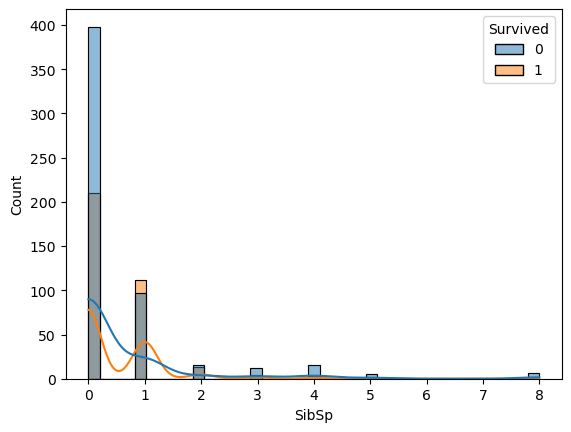

In [31]:
# for SibSp and Survived 
sns.histplot(df, x='SibSp', hue='Survived', kde=True)
# the graph illustrates that most of people that were either alone or in a pair of couple got survived while others died 

<Axes: xlabel='Parch', ylabel='Count'>

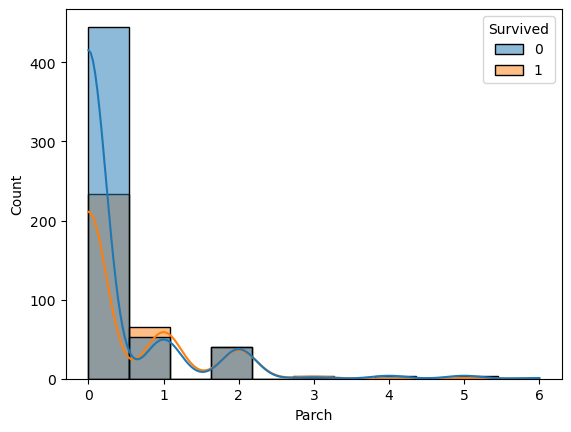

In [32]:
# for Parch and Survived 
sns.histplot(df, x='Parch', hue='Survived', kde=True)
# the graph shows that the sruvival rate of a whole family was very low 

<Axes: xlabel='Fare', ylabel='Count'>

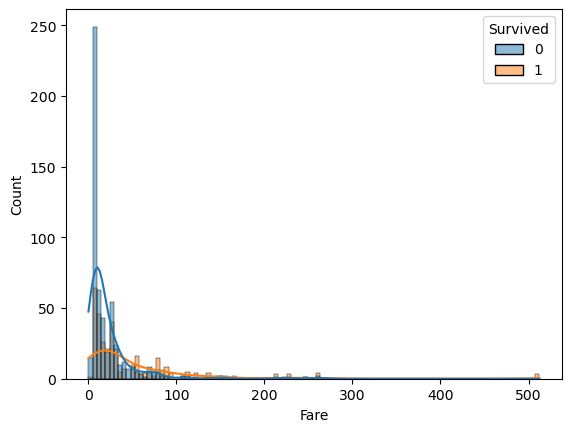

In [33]:
# for Fare and Survived 
sns.histplot(df, x='Fare', hue='Survived', kde=True)
# Although the Fare rate is dramatically increased but the following graph describes that the more the higher Fare was paid by people, the more they had chances for their survival

<Axes: xlabel='Cabin', ylabel='Count'>

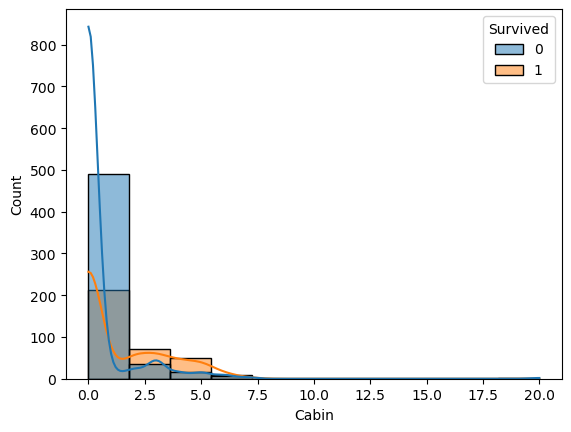

In [34]:
# for Cabin and Survived 
sns.histplot(df, x='Cabin', hue='Survived', kde=True)
# the graph illustrates that most people died from Cabin 0 to 2 i.e. the people who were travelling either without cabin or were in 1 and 2 (Cabin series of unknown, A and B) 

<Axes: xlabel='Embarked', ylabel='Count'>

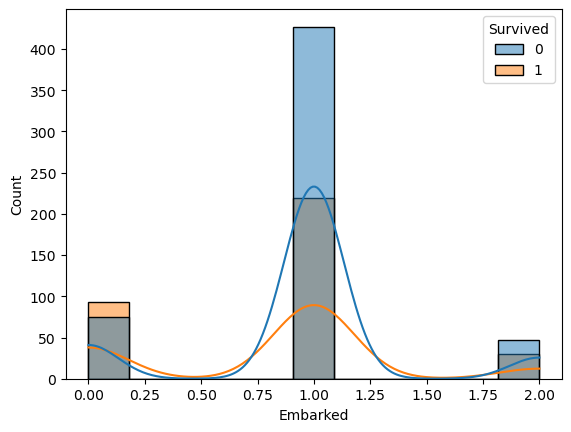

In [35]:
# for Embarked and Survived 
sns.histplot(df, x='Embarked', hue='Survived', kde=True)
# this shows that people that were got on the ship from Queenstown and Cherbourg were mostly died whereas Southampton people survived the accident

# Further Data Visualization 

<Axes: xlabel='Pclass', ylabel='Fare'>

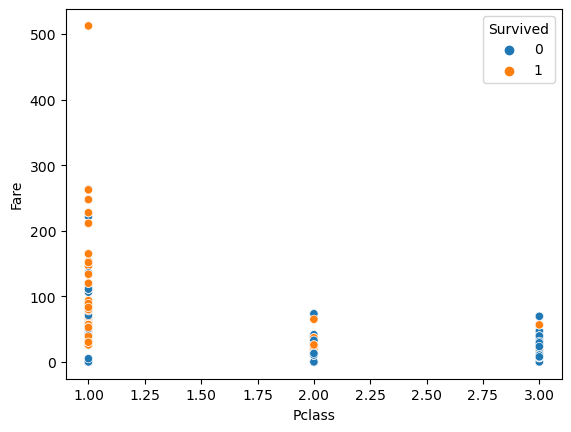

In [36]:
# finding the survival graph by Pclass and Fare 
sns.scatterplot(df, x='Pclass', y='Fare', hue='Survived')
# the following graph shows that most passengers from class 3 and had paid fare under 100 were died. while passengers from class 1 were most survived despite of paid fare below 100

<Axes: xlabel='Sex', ylabel='Age'>

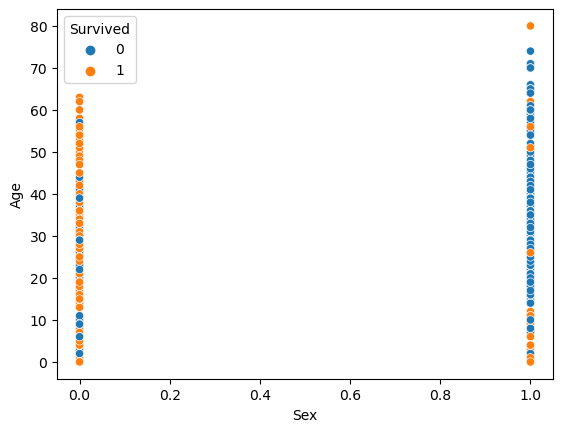

In [37]:
# finding the survival graph by Sex and Age
sns.scatterplot(df, x='Sex', y='Age', hue='Survived')
# 0 referes to female and 1 refers to male for the section sex 
# the graph shows that although there are number of outliers present in the graph but there is a clear picture of fact that most females were survived whereas most males were died. the survival age of womern are from majorly 10 to 60. 

<Axes: xlabel='Cabin', ylabel='Age'>

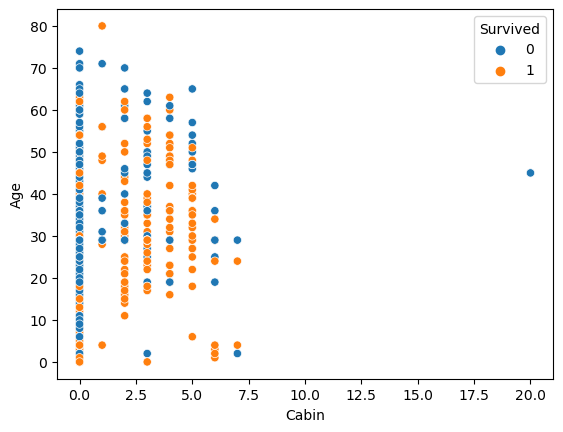

In [38]:
# finding the survival graph by Cabin and Parch
sns.scatterplot(df, x='Cabin', y='Age', hue='Survived')
# the following graph has so many outliers but it is clear from the graph that passenger with missing data or belongs to A series of cabin got died